In [1]:
from os import path
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import numpy as np
from sklearn import metrics
import pandas as pd
from matplotlib.pyplot import savefig
from sklearn.metrics import roc_auc_score

In [13]:
def plot_roc_curve(data_fn):
    plot_title = data_fn.replace('.data','').replace('_',' ').replace('with','+').replace('out respeaking',' original').replace('result/kunwok','')
    x = pd.read_pickle(data_fn)
    y = np.array((len(x['match_dtw'])*[1])+(len(x['nomatch_dtw'])*[0]))
    match_score = map(lambda x: 1-x, x['match_dtw'])
    nomatch_score = map(lambda x: 1-x, x['nomatch_dtw'])
    scores = np.array(list(match_score)+list(nomatch_score))
    tpr, fpr, thresholds = metrics.roc_curve(y, scores)
    auc = roc_auc_score(y, scores)
    print(plot_title+' ROC-AUC: %.3f' % (auc))
    plt.plot(tpr, fpr, label=plot_title)

 topic words + respeaking ROC-AUC: 0.872
 topic words + original ROC-AUC: 0.562
 common words + respeaking ROC-AUC: 0.625
 common words + original ROC-AUC: 0.626


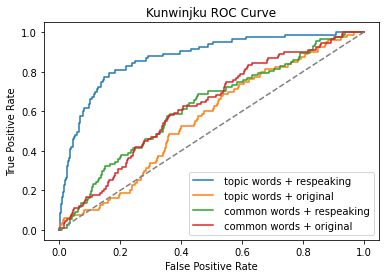

In [15]:
for data_fn in sorted(glob.glob(path.join('result','kunwok_t*.data'))):
    plot_roc_curve(data_fn)

for data_fn in sorted(glob.glob(path.join('result','kunwok_c*.data'))):
    plot_roc_curve(data_fn)
    
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kunwinjku ROC Curve')
plt.legend()
plt.savefig('Kunwinjku_ROC.png', dpi=400)
plt.show()